# Machine Learning Model for Project 'ASL Image Classification'

This problem aims to building a model to predict digit or alphabet by giving input asl (american sign language) image around that data that is sufficiently versatile to handle images of the ASL alphabet with different hands and different backgrounds.

In [28]:
import numpy as np
import pandas as pd
import os
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
print(os.listdir("data"))

['asl_dataset_train', 'asl_dataset_test']


In [36]:
train_dir = 'data/asl_dataset_train'
test_dir = 'data/asl_dataset_test'

# Model saving for easier local iterations
MODEL_DIR = 'model'
MODEL_PATH = MODEL_DIR + '/cnn-model.h5'
MODEL_WEIGHTS_PATH = MODEL_DIR + '/cnn-model.weights.h5'
MODEL_SAVE_TO_DISK = getenv('KAGGLE_WORKING_DIR') != '/kaggle/working'

print('Save model to disk? {}'.format('Yes' if MODEL_SAVE_TO_DISK else 'No'))

Save model to disk? Yes


unique_labels =  ['s', 'h', 'a', 'z', 'o', 'm', '8', 't', '4', 'i', '9', 'w', '6', 'e', '2', 'l', 'k', '5', 'u', 'q', 'y', 'p', 'v', '3', '1', 'r', '0', 'n', 'd', 'g', 'j', 'f', 'c', 'x', '7', 'b']


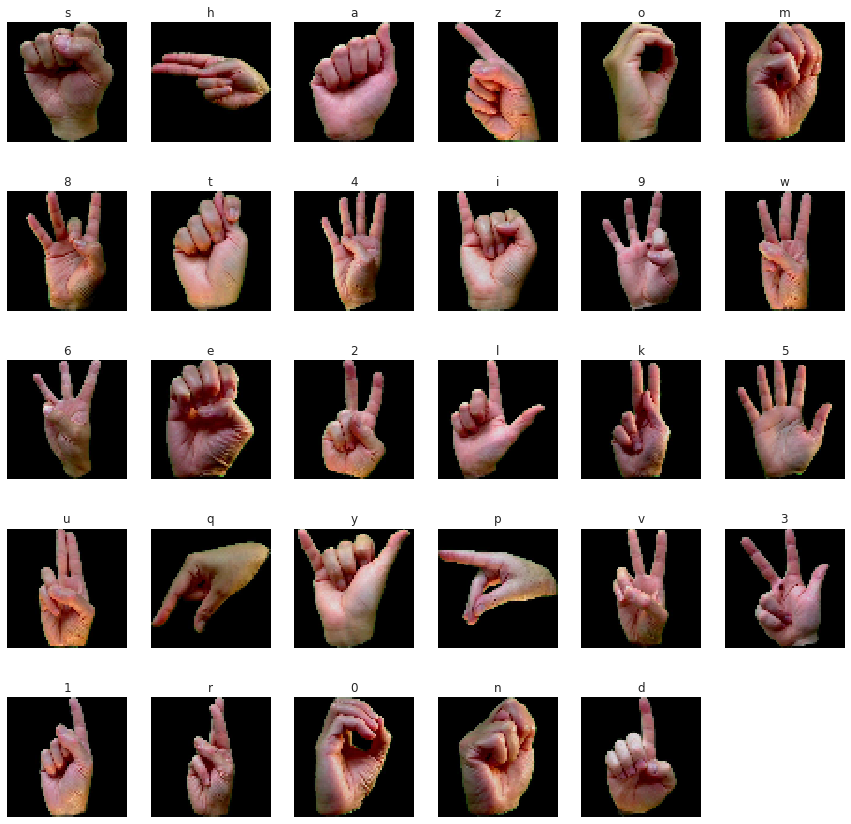

In [30]:
def load_unique():
    size_img = 64,64 
    images_for_plot = []
    labels_for_plot = []
    for folder in os.listdir(train_dir):
        for file in os.listdir(train_dir + '/' + folder):
            filepath = train_dir + '/' + folder + '/' + file
            image = cv2.imread(filepath)
            final_img = cv2.resize(image, size_img)
            final_img = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)
            images_for_plot.append(final_img)
            labels_for_plot.append(folder)
            break
    return images_for_plot, labels_for_plot

images_for_plot, labels_for_plot = load_unique()
print("unique_labels = ", labels_for_plot)

fig = plt.figure(figsize = (15,15))
def plot_images(fig, image, label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    plt.title(label)
    return

image_index = 0
row = 5
col = 6
for i in range(1,(row*col)):
    plot_images(fig, images_for_plot[image_index], labels_for_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()

In [37]:
def build_model(save):
    print('Building model afresh...')
    
    model = Sequential()
    
    model.add(Conv2D(64, kernel_size=4, strides=1, activation='relu', input_shape=TARGET_DIMS))
    model.add(Conv2D(64, kernel_size=4, strides=2, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Conv2D(128, kernel_size=4, strides=1, activation='relu'))
    model.add(Conv2D(128, kernel_size=4, strides=2, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Conv2D(256, kernel_size=4, strides=1, activation='relu'))
    model.add(Conv2D(256, kernel_size=4, strides=2, activation='relu'))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(N_CLASSES, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    if save: model.save(MODEL_PATH)
        
    return model

if REPROCESS_MODEL:
    CNN_MODEL = build_model(save=MODEL_SAVE_TO_DISK)

print_summary(CNN_MODEL)

Building model afresh...
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 61, 61, 64)        3136      
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 29, 29, 64)        65600     
_________________________________________________________________
dropout_13 (Dropout)         (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 26, 26, 128)       131200    
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 12, 12, 128)       262272    
_________________________________________________________________
dropout_14 (Dropout)         (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           

In [50]:
labels_dict = {'a':0,'b':1,'c':2,'d':3,'e':4,'f':5,'g':6,'h':7,'i':8,'j':9,'k':10,'l':11,'m':12,
                   'n':13,'o':14,'p':15,'q':16,'r':17,'s':18,'t':19,'u':20,'v':21,'w':22,'x':23,'y':24,
                   'z':25,'0':26,'1':27,'2':28,'3':29,'4':30,'5':31,'6':32,'7':33,'8':34,'9':'35'}

def load_data():
    """
    Loads data and preprocess. Returns train and test data along with labels.
    """
    images = []
    labels = []
    size = 64,64
    print("LOADING DATA FROM : ",end = "")
    for folder in os.listdir(train_dir):
        print(folder, end = ' | ')
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            labels.append(labels_dict[folder])
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    labels = keras.utils.to_categorical(labels)
    
    X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.05)
    
    print()
    print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
    print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)
    
    return X_train, X_test, Y_train, Y_test

In [51]:
X_train, X_test, Y_train, Y_test = load_data()

LOADING DATA FROM : s | h | a | z | o | m | 8 | t | 4 | i | 9 | w | 6 | e | 2 | l | k | 5 | u | q | y | p | v | 3 | 1 | r | 0 | n | d | g | j | f | c | x | 7 | b | 
Loaded 2389 images for training, Train data shape = (2389, 64, 64, 3)
Loaded 126 images for testing Test data shape = (126, 64, 64, 3)


In [54]:
def create_model():
    
    model = Sequential()
    
    model.add(Conv2D(16, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (64,64,3)))
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
    model.add(Dense(36, activation = 'softmax'))
    
    model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ["accuracy"])
    
    print("MODEL CREATED")
    model.summary()
    
    return model

def fit_model():
    model_hist = model.fit(X_train, Y_train, batch_size = 64, epochs = 5, validation_split = 0.1)
    return model_hist 

In [55]:
model = create_model()
curr_model_hist = fit_model()

MODEL CREATED
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 21, 21, 32)        9248      
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 7, 7

In [57]:
evaluate_metrics = model.evaluate(X_test, Y_test)
print("\nEvaluation Accuracy = ", "{:.2f}%".format(evaluate_metrics[1]*100),"\nEvaluation loss = " ,"{:.6f}".format(evaluate_metrics[0]))

126/126 [==============================] - 0s 2ms/step

Evaluation Accuracy =  91.27% 
Evaluation loss =  1.901312
